# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

train_labels = pd.Series(y_train)
valid_labels = pd.Series(y_valid)
test_labels = pd.Series(y_test)

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = train_labels.nunique()

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Load labels matchup table

In [3]:
labels_matchup = pd.read_csv('./signnames.csv', index_col='ClassId')

# Prepare matchup list
labels_matchup_list = labels_matchup['SignName'].tolist()

# Prepare matchup table
labels_matchup_table = dict(enumerate(labels_matchup_list))

# Show first 10 rows
labels_matchup.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


#### Random traffic sign images

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

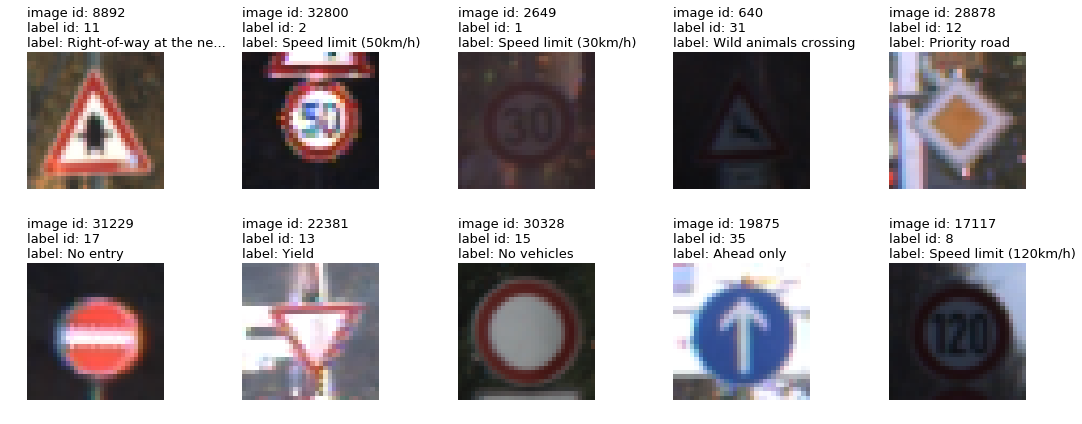

In [5]:
# Take a random sample of 10 images
# (remove optional random_state argument from sampling to get unique sample)
random_images_ids = train_labels.sample(n=10, random_state=42).index.tolist()

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
fig.subplots_adjust(left=0.03, right=0.97,hspace=0.2, wspace=0.05)
for i, ax in enumerate(axs.flat):
    # Plot image
    ax.imshow(X_train[random_images_ids[i]])
    
    # Load label meta
    label_id = train_labels[random_images_ids[i]]
    label = labels_matchup_list[label_id]
    # Truncate overflowing labels
    max_len = 22
    label = f'{label[:max_len]}...' if len(label) > max_len else label
    
    # Set title
    title_1st_line = f'image id: {random_images_ids[i]}'
    title_2nd_line = f'label id: {label_id}'
    title_3rd_line = f'label: {label}'
    title = f'{title_1st_line}\n{title_2nd_line}\n{title_3rd_line}'
    ax.set_title(title, fontsize=13, loc="left")
    
    # Turn off axis
    ax.axis('off')
plt.tight_layout()

##### DISCUSSION:
From the sample we can see that lots of preprocessing is needed to normalize the input data. Images are taken from various perspectives. Furthermore they were taken at various outside conditions, some images are overbrighten or darkened. Other issue is low contrast in images, apparently related to camera quality, and the distance to the sign.

#### Distributions of classes in the training, validation and test set
##### Training data

In [6]:
import base64
from io import BytesIO

from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, push_notebook
import ipywidgets as wg
import numpy as np

output_notebook()

Loading BokehJS ...

In [7]:
def get_dataframe(dataset):
    features, labels = None, None
    if dataset == "training":
        features, labels = X_train, pd.Series(y_train)
    elif dataset == "validation":
        features, labels = X_valid, pd.Series(y_valid)
    elif dataset == "testing":
        features, labels = X_test, pd.Series(y_test)
        
    # number of labels in a dataset
    n_labels = labels.nunique()
    
    # get list of cumulated labels counts
    counts_list = labels.value_counts().sort_index().tolist()
    
    # group lists of images ordered by label id
    imgs_by_label_id_lists = [labels.where(labels == n).dropna().index.values.tolist() for n in range(n_labels)]
    
    # get list of png images ordered by label id
    png_rand_imgs_list = []
    for imgs_list in imgs_by_label_id_lists:
        # pick random image of a given label
        rand_img = features[np.random.choice(imgs_list)]
        
        # prepare plot
        fig = plt.imshow(rand_img)
        plt.axis("off")
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        
        # save plot as in-memory binary stream
        tmpfile = BytesIO()
        plt.savefig(tmpfile, format='png', bbox_inches='tight', pad_inches = 0)
        
        # return the content of the buffer and append to img list
        png_rand_imgs_list.append(tmpfile.getvalue())
    # prevents plotting of the last plot
    plt.close()
        
    # get list of binary images ordered by label id
    binary_rand_imgs_list = list(map(lambda x: base64.b64encode(x).decode("utf-8"), png_rand_imgs_list))
    
    # prepare pandas DataFrame
    df = pd.DataFrame.from_dict({
        'count': counts_list,
        'label': labels_matchup_list,
        'rand_img_binary': binary_rand_imgs_list
    })
    
    return df.reset_index()

In [8]:
datasets_dfs = {
    'training': get_dataframe('training'),
    'validation': get_dataframe('validation'),
    'testing': get_dataframe('testing'),
}

In [9]:
# Index is reset on purpose, to easily order rows by label id
datasets_dfs['training'].head(10)

,index,count,label,rand_img_binary
0,0,180,Speed limit (20km/h),iVBORw0KGgoAAAANSUhEUgAAANkAAADZCAYAAACtvpV2AA...
1,1,1980,Speed limit (30km/h),iVBORw0KGgoAAAANSUhEUgAAANkAAADZCAYAAACtvpV2AA...
2,2,2010,Speed limit (50km/h),iVBORw0KGgoAAAANSUhEUgAAANkAAADZCAYAAACtvpV2AA...
3,3,1260,Speed limit (60km/h),iVBORw0KGgoAAAANSUhEUgAAANkAAADZCAYAAACtvpV2AA...
4,4,1770,Speed limit (70km/h),iVBORw0KGgoAAAANSUhEUgAAANkAAADZCAYAAACtvpV2AA...
5,5,1650,Speed limit (80km/h),iVBORw0KGgoAAAANSUhEUgAAANkAAADZCAYAAACtvpV2AA...
6,6,360,End of speed limit (80km/h),iVBORw0KGgoAAAANSUhEUgAAANkAAADZCAYAAACtvpV2AA...
7,7,1290,Speed limit (100km/h),iVBORw0KGgoAAAANSUhEUgAAANkAAADZCAYAAACtvpV2AA...
8,8,1260,Speed limit (120km/h),iVBORw0KGgoAAAANSUhEUgAAANkAAADZCAYAAACtvpV2AA...
9,9,1320,No passing,iVBORw0KGgoAAAANSUhEUgAAANkAAADZCAYAAACtvpV2AA...


In [10]:
def dataframe2columndict(dataset):
    out_dict = {}

    column_name = None
    for column in dataset.columns:
        out_dict[column] = dataset[column].tolist()

    return out_dict

In [11]:
from bokeh.models import ColumnDataSource

TOOLTIPS = """
    <div>
        <div>
            <img
                src="data:image/png;base64,@rand_img_binary" height="100" alt="" width="100"
                style="float: left;"
                border="2"
            ></img>
        </div>
        Label id: <span style="font-size: 14px;">@index</span>
        Images count: <span style="font-size: 14px;">@count</span>
    </div>
"""

source = ColumnDataSource(data={
    'label':[],
    'count':[],
    'rand_img_binary':[]
})

p = figure(y_range=[], title="Labels distribution in Training data", tooltips=TOOLTIPS)
p.ygrid.grid_line_color = None
p.x_range.start = 0
p.xaxis.axis_label = "Cumulated label occurence count"

r = p.hbar('label', right='count', height=0.5, source=source, color="#3D92FE")

def update(picked_dataset="training", picked_order="count", picked_sort="ascending"):
    p.title.text = f'Labels distribution in {picked_dataset.capitalize()} data'
    
    dataset = datasets_dfs[picked_dataset]

    dataset = dataset.sort_values(
        'count' if picked_order == "count" else "index",
        ascending=True if picked_sort == "ascending" else False)
    
    p.y_range.factors = dataset['label'].tolist()
    
    source.data = dataframe2columndict(dataset)
    
    push_notebook()
    
show(p, notebook_handle=True)

DatasetPicker = wg.Dropdown(
    options=['training', 'validation', 'testing'],
    value='training',
    description='Dataset:',
    disabled=False,
)

OrderPicker = wg.ToggleButtons(
    options=['label id', 'count'],
    value='label id',
    description='Order by:',
    disabled=False
)

SortPicker = wg.ToggleButtons(
    options=['ascending', 'descending'],
    value='ascending',
    description='Sort:',
    disabled=False
)

# img = wg.Image(  NOTE: To output image with this widget image should be in a png format
#     value=png_img_list[0],
#     format='png',
#     width=200,
#     height=200,
# )

w=wg.interactive(update,
                 picked_dataset=DatasetPicker,
                 picked_order=OrderPicker,
                 picked_sort=SortPicker)
w

interactive(children=(Dropdown(description='Dataset:', options=('training', 'validation', 'testing'), value='t…

##### Distributions comparison

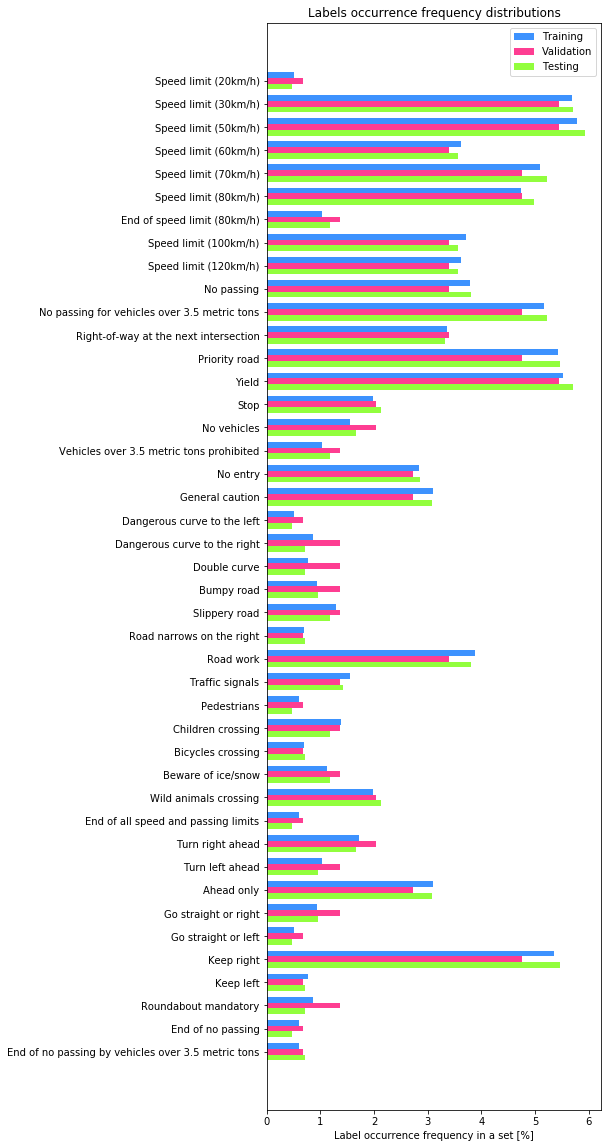

In [12]:
fig, ax = plt.subplots()
fig.set_figheight(20)
y_pos = np.arange(n_classes) * 2
bar_width = 0.5

train_labels_len = train_labels.size
train_labels_count = train_labels.value_counts().sort_index()
train_labels_count_norm = list(map(lambda x: x/train_labels_len * 100, train_labels_count))

valid_labels_len = valid_labels.size
valid_labels_count = valid_labels.value_counts().sort_index()
valid_labels_count_norm = list(map(lambda x: x/valid_labels_len * 100, valid_labels_count))

test_labels_len = test_labels.size
test_labels_count = test_labels.value_counts().sort_index()
test_labels_count_norm = list(map(lambda x: x/test_labels_len * 100, test_labels_count))

p1 = ax.barh(y_pos, train_labels_count_norm, bar_width, align='center', color='#3D92FE')
p2 = ax.barh(y_pos + bar_width, valid_labels_count_norm, bar_width, align='center', color='#FE3D92')
p3 = ax.barh(y_pos + 2*bar_width, test_labels_count_norm, bar_width, align='center', color='#92FE3D')

ax.set_yticks(y_pos + bar_width / 1)
ax.set_yticklabels(labels_matchup_list)
ax.invert_yaxis()
ax.legend((p1[0], p2[0], p3[0]), ('Training', 'Validation', 'Testing'))
ax.set_xlabel('Label occurrence frequency in a set [%]')
ax.set_title('Labels occurrence frequency distributions')

plt.show()

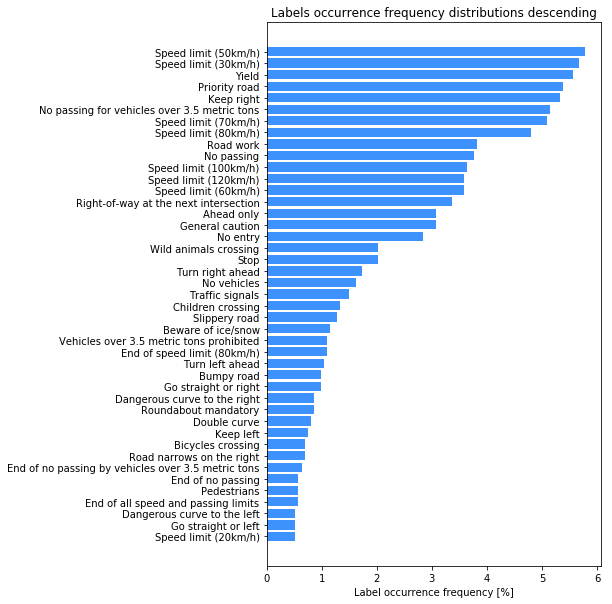

In [13]:
fig, ax = plt.subplots()
fig.set_figheight(10)
y_pos = np.arange(n_classes)

labels_len = train_labels_len + valid_labels_len + test_labels_len
labels_counts = (train_labels_count + valid_labels_count + test_labels_count).sort_values(ascending=False)
labels_counts_norm = list(map(lambda x: x/labels_len * 100, labels_counts))
labels_counts = pd.DataFrame(labels_counts)
labels_counts.index.name = 'ClassId'
labels_counts.columns = ['Count']

labels_counts = labels_counts.reset_index()
labels_counts["ClassId"] = labels_counts["ClassId"].map(labels_matchup_table)
labels_ordered_by_count = list(labels_counts["ClassId"])

ax.barh(y_pos, labels_counts_norm, align='center', color='#3D92FE')

ax.set_yticks(y_pos)
ax.set_yticklabels(labels_ordered_by_count)
ax.invert_yaxis()

ax.set_xlabel('Label occurrence frequency [%]')
ax.set_title('Labels occurrence frequency distributions descending')

plt.show()

##### DISCUSSION:
From the first graph we can conclude that distributions are pretty much the same over all three sets.
The most popular signs across all three sets are:
* Speed limit (50km/h)
* Speed limit (30km/h)
* Yield
* Priority road
* Keep right

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Step 2.0. Uniform aspect ratio. Image scaling

Input images are already of the same aspect ratio, and scaled to consistent shape (32,32,3).
Therefore this step is omitted.

### Step 2.1. Mean, standard deviation of input data

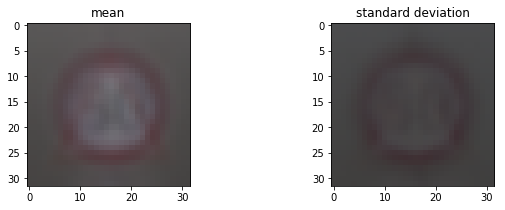

In [14]:
mean_img = np.mean(X_train, axis=0).astype(int)
std_img = np.std(X_train, axis=0).astype(int)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].set_title('mean')
axs[0].imshow(mean_img)

axs[1].set_title('standard deviation')
axs[1].imshow(std_img)

##### DISCUSSION:
Depiction of mean and standard deviation in whole train dataset, clearly shows an impression of a traffic sign. From the mean image we can conclude that the most often occuring sign shape across training dataset is circle. We can also hardly see a traingular shape. It's is also worth noting that we would mostly deal with warning signs, as we can clearly see the red frame. High occurence frequency of warning signs can also be deduced from previous histogram plots.
The standard deviation of all images however shows that images mostly vary at the boundaries and center of the image. Higher variance values show up whiter.

### Step 2.2. Normalizing image inputs

In [15]:
X_train_norm = (X_train - mean_img)/std_img
X_valid_norm = (X_valid - mean_img)/std_img
X_test_norm = (X_test - mean_img)/std_img

print('MIN:', np.min(X_train_norm))
print('MAX:', np.max(X_train_norm))
print('MEAN: ', np.mean(X_train_norm))
print('STD: ', np.std(X_train_norm))

MIN: -1.5211267605633803
MAX: 4.170212765957447
MEAN:  0.007662847967327345
STD:  1.0075750261962833


##### DISCUSSION:
Mean over the whole training set is very close to zero, and the standard variation is approximately equal.

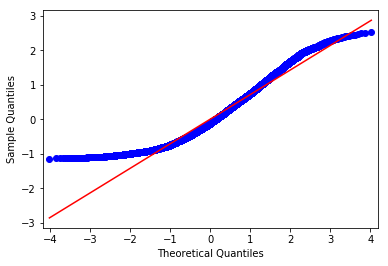

In [16]:
import statsmodels.api as sm

# q-q plot for training data
sm.qqplot(np.array([np.mean(n) for n in X_train_norm]), line='s')

plt.show()

#### Data scaling to range [0, 1]

In [17]:
# Normalised [0,1]
X_train_norm_0_1 = (X_train_norm - np.min(X_train_norm))/np.ptp(X_train_norm)
X_valid_norm_0_1 = (X_valid_norm - np.min(X_valid_norm))/np.ptp(X_valid_norm)
X_test_norm_0_1 = (X_test_norm - np.min(X_test_norm))/np.ptp(X_test_norm)

# Normalised [0,255] as integer
# X_train_norm_0_255 = (255*(X_train_norm - np.min(X_train_norm))/np.ptp(X_train_norm)).astype(int)
# X_test_norm_0_255 = (255*(X_test_norm - np.min(X_test_norm))/np.ptp(X_test_norm)).astype(int)

# Normalised [-1,1]
# X_train_norm_1_1 = 2*(X_train_norm - np.min(X_train_norm))/np.ptp(X_train_norm)-1
# X_valid_norm_1_1 = 2*(X_valid_norm - np.min(X_valid_norm))/np.ptp(X_valid_norm)-1
# X_test_norm_1_1 = 2*(X_test_norm - np.min(X_test_norm))/np.ptp(X_test_norm)-1

assert np.min(X_train_norm_0_1) == 0
assert np.max(X_train_norm_0_1) == 1

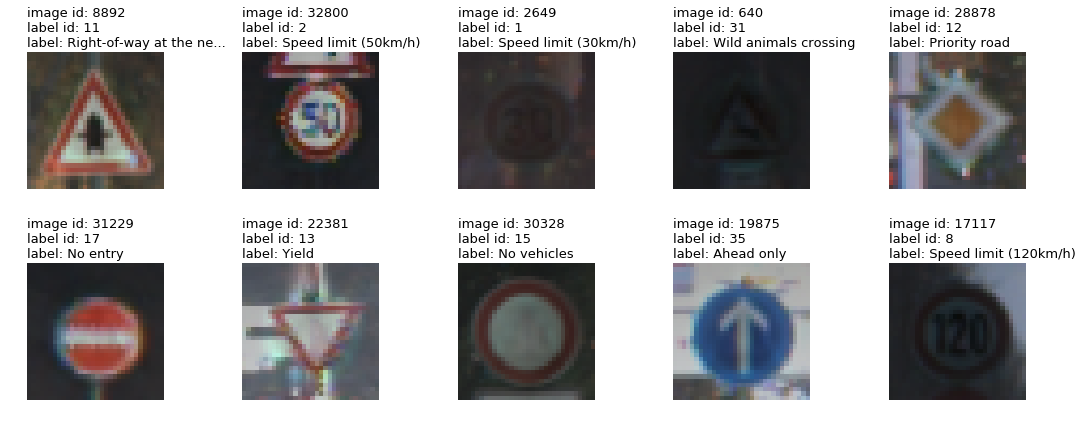

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
fig.subplots_adjust(left=0.03, right=0.97,hspace=0.2, wspace=0.05)
for i, ax in enumerate(axs.flat):
    # Plot image
    ax.imshow(X_train_norm_0_1[random_images_ids[i]])
    
    # Load label meta
    label_id = train_labels[random_images_ids[i]]
    label = labels_matchup_list[label_id]
    # Truncate overflowing labels
    max_len = 22
    label = f'{label[:max_len]}...' if len(label) > max_len else label
    
    # Set title
    title_1st_line = f'image id: {random_images_ids[i]}'
    title_2nd_line = f'label id: {label_id}'
    title_3rd_line = f'label: {label}'
    title = f'{title_1st_line}\n{title_2nd_line}\n{title_3rd_line}'
    ax.set_title(title, fontsize=13, loc="left")
    
    # Turn off axis
    ax.axis('off')
plt.tight_layout()

##### DISCUSSION:
Normalization is an important step ensuring each pixel has a similar data distribution. This step makes covergence faster while training the network. Data normalization is done by subtracting the mean from each pixel, and then dividing by the standard deviation.

For image inputs, pixel values should be positive, so data should be normalized to range [0,1] or [0,255]. I will use [0,1] range.

### Step 2.3. Dimensionality reduction
#### Grayscale conversion

In [19]:
X_train_gray = np.mean(X_train_norm_0_1, axis=3, keepdims=True)
X_valid_gray = np.mean(X_valid_norm_0_1, axis=3, keepdims=True)
X_test_gray = np.mean(X_test_norm_0_1, axis=3, keepdims=True)

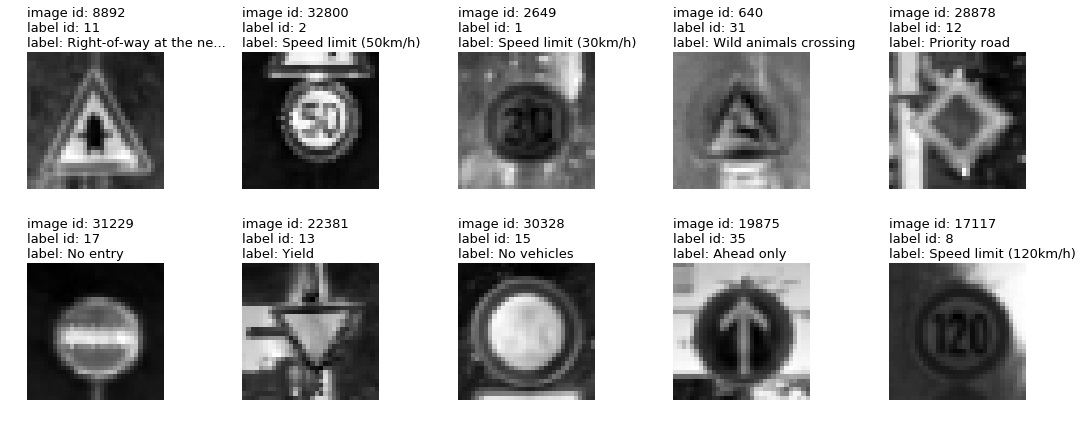

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
fig.subplots_adjust(left=0.03, right=0.97,hspace=0.2, wspace=0.05)
for i, ax in enumerate(axs.flat):
    # Plot image
    ax.imshow(X_train_gray[random_images_ids[i]].reshape(32,32), cmap='gray')
    
    # Load label meta
    label_id = train_labels[random_images_ids[i]]
    label = labels_matchup_list[label_id]
    # Truncate overflowing labels
    max_len = 22
    label = f'{label[:max_len]}...' if len(label) > max_len else label
    
    # Set title
    title_1st_line = f'image id: {random_images_ids[i]}'
    title_2nd_line = f'label id: {label_id}'
    title_3rd_line = f'label: {label}'
    title = f'{title_1st_line}\n{title_2nd_line}\n{title_3rd_line}'
    ax.set_title(title, fontsize=13, loc="left")
    
    # Turn off axis
    ax.axis('off')
plt.tight_layout()

##### DISCUSSION:
Dimensional reduction is performed by collapsing the RGB channels into a single gray-scale channel.
Reducing other dimensions allows neural network performance to be invariant of those other dimensions, and make the training more controllable

### Step 2.4. Data augmentation
In this step I will use only augmentation techniques that makes sense in specified application, e.g. augmentation through flipping of the image (both horizontal or vertical) wouldn't make sense at all.
However these techniques seems applicable:
* random image rotation
* random brightness
* random contrast
* random hue
* random saturation
* cropping
* adding salt and pepper or gaussian noise
* scaling
* translation
* warping

##### DISCUSSION:
Data augmentation is done to expose the neural network to a wide variety of variations. This makes it less likely that the neural network recognizes unwanted characteristics in the dataset.

In final solution I did decide not to use any of those techniques, since I did not see significant change in accuracy. The most simple preprocessing (normalization and grayscale) achieved the best accuracy.

### Model Architecture

In [21]:
from sklearn.utils import shuffle

X_train_out, y_train_out = shuffle(X_train_gray, y_train)

In [22]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#### Features and Labels

In [23]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Training Pipeline

In [24]:
rate = 0.000975

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Model Evaluation

In [25]:
EPOCHS = 80
BATCH_SIZE = 128

In [26]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Training the Model

In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_out)

    print("Training...")
    print()
    validation_acc_plot = []
    for i in range(EPOCHS):
        X_train_out, y_train_out = shuffle(X_train_out, y_train_out)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_out[offset:end], y_train_out[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid_gray, y_valid)*100
        validation_acc_plot.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        
        print("Validation Accuracy = {:2.2f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 31.36

EPOCH 2 ...
Validation Accuracy = 55.03

EPOCH 3 ...
Validation Accuracy = 68.14

EPOCH 4 ...
Validation Accuracy = 76.30

EPOCH 5 ...
Validation Accuracy = 79.52

EPOCH 6 ...
Validation Accuracy = 81.95

EPOCH 7 ...
Validation Accuracy = 82.79

EPOCH 8 ...
Validation Accuracy = 84.31

EPOCH 9 ...
Validation Accuracy = 85.53

EPOCH 10 ...
Validation Accuracy = 88.91

EPOCH 11 ...
Validation Accuracy = 88.07

EPOCH 12 ...
Validation Accuracy = 87.91

EPOCH 13 ...
Validation Accuracy = 89.52

EPOCH 14 ...
Validation Accuracy = 89.55

EPOCH 15 ...
Validation Accuracy = 88.71

EPOCH 16 ...
Validation Accuracy = 89.68

EPOCH 17 ...
Validation Accuracy = 89.84

EPOCH 18 ...
Validation Accuracy = 90.27

EPOCH 19 ...
Validation Accuracy = 89.93

EPOCH 20 ...
Validation Accuracy = 91.34

EPOCH 21 ...
Validation Accuracy = 90.82

EPOCH 22 ...
Validation Accuracy = 90.45

EPOCH 23 ...
Validation Accuracy = 91.25

EPOCH 24 ...
Validation Accura

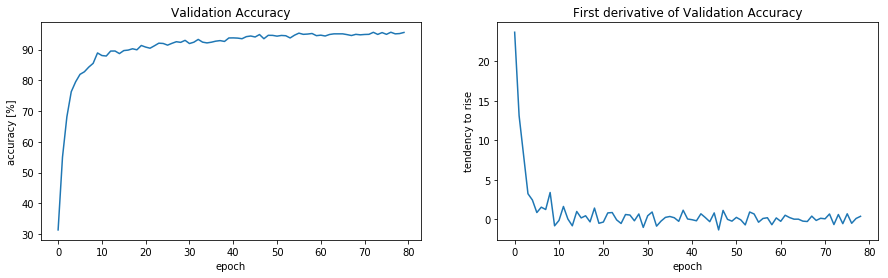

In [28]:
fig, ax = plt.subplots()
fig.set_figwidth(15)

plt.subplot(1, 2, 1)
plt.plot(validation_acc_plot)
plt.title("Validation Accuracy")
plt.ylabel('accuracy [%]')
plt.xlabel('epoch')

validation_diff_plot = np.diff(validation_acc_plot) / np.diff(np.arange(EPOCHS))
plt.subplot(1, 2, 2)
plt.plot(validation_diff_plot)
plt.title("First derivative of Validation Accuracy")
plt.ylabel('tendency to rise')
plt.xlabel('epoch')
plt.show()

#### Best Attempts

Only the best attempts for selected setups are listed

Id | Date & Hour | Accuracy [%] | Preprocessing Steps | Model | Epochs | Batch size | Learning Rate | Mu | Sigma | Keep prob
---|-------------|--------------|---------------------|-------|--------|------------|---------------|--|-------|----------
0  | 11.11.2018 20:32 | 89.95 | <ul><li>normalization</li><li>grayscale</li></ul> | LeNet | 10 | 128 | 0.001 | 0 | 0.1 | none
1  | 11.11.2018 21:07 | 94.99 | <ul><li>normalization</li><li>grayscale</li></ul> | LeNet | 60 | 100 | 0.001 | 0 | 0.1 | 0.5
2  | 11.11.2018 22:02 | 95.53 | <ul><li>normalization</li><li>grayscale</li></ul> | LeNet | 60 | 128 | 0.001 | 0 | 0.1 | 0.5
3  | 11.11.2018 22:51 | 94.44 | <ul><li>normalization</li><li>grayscale</li></ul> | LeNet | 60 | 128 | 0.0008 | 0 | 0.1 | 0.5
4  | 11.11.2018 22:57 | 94.31 | <ul><li>normalization</li><li>grayscale</li></ul> | LeNet | 60 | 128 | 0.0009 | 0 | 0.1 | 0.5
5  | 11.11.2018 23:02 | 95.05 | <ul><li>normalization</li><li>grayscale</li></ul> | LeNet | 60 | 128 | 0.00095 | 0 | 0.1 | 0.5
6  | 11.11.2018 23:04 | **96.01** | <ul><li>normalization</li><li>grayscale</li></ul> | LeNet | 60 | 128 | 0.000975 | 0 | 0.1 | 0.5
7  | 12.11.2018 07:55 | 95.53 | <ul><li>normalization</li><li>grayscale</li></ul> | LeNet | 100 | 128 | 0.000975 | 0 | 0.1 | 0.5

#### Testing the model

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_gray, y_test)*100
    print("Test Set Accuracy = {:2.2f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 93.26


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Source of images Google StreetView
* [Sign1](https://www.google.com/maps/@52.4680177,13.235519,3a,75y,51.45h,84.46t/data=!3m6!1e1!3m4!1sSzSMM7_Q0JAX9rVD4o1Adg!2e0!7i13312!8i6656)
* [Sign2](https://www.google.pl/maps/@52.4693672,13.2361987,3a,75y,34.3h,72.82t/data=!3m7!1e1!3m5!1sy1hzZOv7fXG25xVEA7AVIw!2e0!6s%2F%2Fgeo2.ggpht.com%2Fcbk%3Fpanoid%3Dy1hzZOv7fXG25xVEA7AVIw%26output%3Dthumbnail%26cb_client%3Dmaps_sv.tactile.gps%26thumb%3D2%26w%3D203%26h%3D100%26yaw%3D307.40005%26pitch%3D0%26thumbfov%3D100!7i13312!8i6656)
* [Sign3](https://www.google.pl/maps/@52.4693316,13.2358061,3a,75y,31.75h,76.32t/data=!3m6!1e1!3m4!1st_pOWSnnz8quUIH-hoNPsg!2e0!7i13312!8i6656)
* [Sign4](https://www.google.pl/maps/@52.4694002,13.2366136,3a,75y,302.1h,77.77t/data=!3m6!1e1!3m4!1sSgOVv3pve56ZYQiTRgpxsQ!2e0!7i13312!8i6656)
* [Sign5](https://www.google.pl/maps/@52.4694002,13.2366136,3a,75y,302.1h,77.77t/data=!3m6!1e1!3m4!1sSgOVv3pve56ZYQiTRgpxsQ!2e0!7i13312!8i6656)

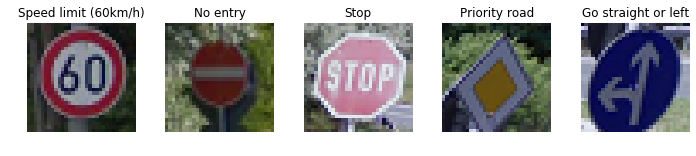

In [37]:
import cv2
import glob

verify_imgs = []
verify_labels = np.array([3,17,14,12,37])

fig, axs = plt.subplots(1,5, figsize=(12, 2))
for i, img in enumerate(glob.glob('./found_images/*.png')):
    image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    axs[i].set_title(labels_matchup_list[verify_labels[i]])
    axs[i].axis('off')
    axs[i].imshow(image)
    verify_imgs.append(image)

In [38]:
verify_imgs = np.array(verify_imgs)
verify_imgs_norm = (verify_imgs - mean_img)/std_img
verify_imgs_norm = (verify_imgs_norm - np.min(verify_imgs_norm))/np.ptp(verify_imgs_norm)
verify_imgs_gray = np.mean(verify_imgs_norm, axis=3, keepdims=True)

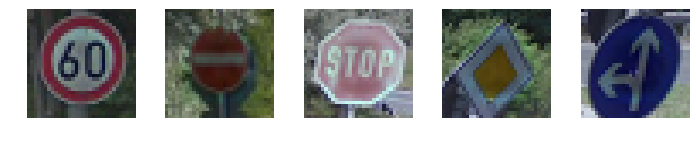

In [39]:
fig, axs = plt.subplots(1,5, figsize=(12, 2))
for i, img in enumerate(verify_imgs_norm):
    axs[i].axis('off')
    axs[i].imshow(img)

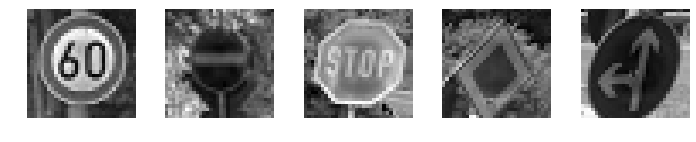

In [40]:
fig, axs = plt.subplots(1,5, figsize=(12, 2))
for i, img in enumerate(verify_imgs_gray):
    axs[i].axis('off')
    axs[i].imshow(img.reshape(32,32), cmap='gray')

### Predict the Sign Type for Each Image

In [41]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_accuracy = evaluate(verify_imgs_gray, verify_labels)
    print("My Data Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
My Data Set Accuracy = 1.000


### Analyze Performance

In [42]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    index = 0
    for verify_img, verify_label in zip(verify_imgs_gray, verify_labels):
        ls_img = [verify_img]
        ls_label = [verify_label]
        my_accuracy = evaluate(ls_img, ls_label)
        print('Image {}'.format(index))
        print("Image Accuracy = {:2.2f}".format(my_accuracy))
        print()
        index+=1

INFO:tensorflow:Restoring parameters from ./lenet
Image 0
Image Accuracy = 1.00

Image 1
Image Accuracy = 1.00

Image 2
Image Accuracy = 1.00

Image 3
Image Accuracy = 1.00

Image 4
Image Accuracy = 1.00



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from ./lenet


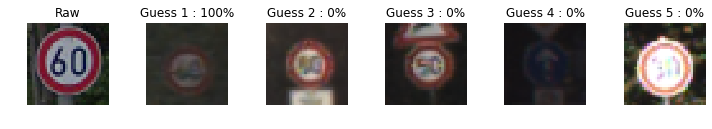

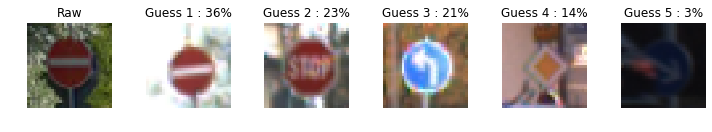

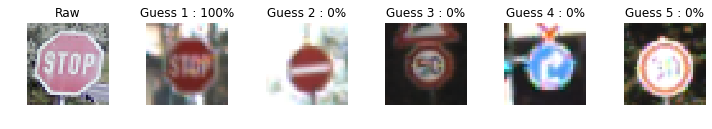

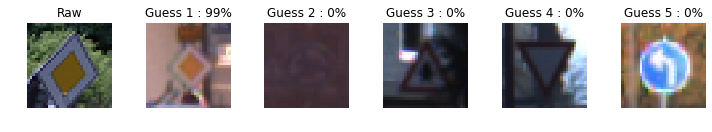

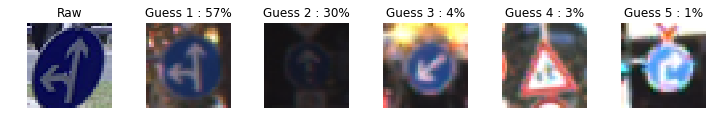

In [43]:
k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    verify_softmax_logits = sess.run(softmax_logits, feed_dict={x: verify_imgs_gray, keep_prob: 1.0})
    verify_top_k = sess.run(top_k, feed_dict={x: verify_imgs_gray, keep_prob: 1.0})
    
    for i in range(5):
        figures = {}
        labels = {}
        
        figures[0] = verify_imgs[i]
        labels[0] = "Raw"
        for j in range(k_size):
            labels[j+1] = 'Guess {} : {:.0f}%'.format(j+1, 100*verify_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == verify_top_k[1][i][j])[0]].squeeze()

        fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(10, 10))
        axs = axs.ravel()
        for index, img_id in enumerate(figures):
            axs[index].imshow(figures[img_id])
            axs[index].set_title(labels[index])
            axs[index].set_axis_off()

        plt.tight_layout()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Articles I made use of:
* [Image Data Pre-Processing for Neural Networks](https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258)
* [NanoNets : How to use Deep Learning when you have Limited Data](https://medium.com/nanonets/nanonets-how-to-use-deep-learning-when-you-have-limited-data-f68c0b512cab)
* [Data Augmentation | How to use Deep Learning when you have Limited Data — Part 2](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced)
* [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)
* [A Gentle Introduction to Normality Tests in Python](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
* [Data Augmentation Techniques in CNN using Tensorflow](https://medium.com/ymedialabs-innovation/data-augmentation-techniques-in-cnn-using-tensorflow-371ae43d5be9)
* [Tensorflow Image: Augmentation on GPU](https://towardsdatascience.com/tensorflow-image-augmentation-on-gpu-bf0eaac4c967)

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")